## Qusetion 1

(a). Please fill in the missing code to train 3 different MLPs. And then compare their accuracy values by plotting a bar chart.

In [12]:
%matplotlib inline

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt

device = torch.device('cpu')

batch_size = 64

train_transform = transforms.Compose([ transforms.ToTensor()])

test_transform = transforms.Compose([transforms.ToTensor()])

train_dataset = datasets.MNIST('./data', 
                               train=True, 
                               download=True, 
                               transform=train_transform)

validation_dataset = datasets.MNIST('./data', 
                                    train=False, 
                                    transform=test_transform)

## construct the loader for training
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
                                          shuffle=True)

## construct the loader for validation
validation_loader = torch.utils.data.DataLoader(validation_dataset, batch_size=batch_size,
                                         shuffle=False)



class Net1(nn.Module):
    def __init__(self):
        super(Net1, self).__init__()
        
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        
        ## forward x to the first fully connected layer.
        x = self.fc1(x)
        
        ## forward x to sigmoid activation function.
        x = torch.sigmoid(x)
        
        ## forward x to the second fully connected layer.
        x = self.fc2(x)
        
        ## forward x to softmax activation function.
        m = nn.Softmax()
        x = m(x)
        
        return x

    
class Net2(nn.Module):
    def __init__(self):
        super(Net2, self).__init__()
        
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        
        ## forward x to the first fully connected layer.
        x = self.fc1(x)
        
        ## forward x to relu activation function.
        x = F.relu(x)
        
        ## forward x to the second fully connected layer.
        x = self.fc2(x)
        
        ## forward x to softmax activation function.
        x = F.softmax(x)
        
        return x    

class Net3(nn.Module):
    def __init__(self):
        super(Net3, self).__init__()
        
        self.fc1 = nn.Linear(28*28, 16)
        self.fc2 = nn.Linear(16, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        
        ## forward x to the first fully connected layer.
        x = self.fc1(x)
        
        ## forward x to relu activation function.
        x = F.relu(x)
        
        ## forward x to the second fully connected layer.
        x = self.fc2(x)
        
        ## forward x to softmax activation function.
        x = F.softmax(x)
        
        return x   
    
def train(epoch, log_interval=200):
    model.train()
    
    for batch_idx, (data, target) in enumerate(train_loader):
        data = data.to(device)
        target = target.to(device)

        ## zero gradient buffers
        optimizer.zero_grad()
        
        ## pass data through the network
        output = model(data)

        ## calculate loss
        loss = criterion(output, target)

        ## backpropagate
        loss.backward()
        
        ## update weights
        optimizer.step()
        
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.data.item()))

def validate(loss_vector, accuracy_vector):
    model.eval()
    val_loss, correct = 0, 0
    for data, target in validation_loader:
        data = data.to(device)
        target = target.to(device)
        output = model(data)
        val_loss += criterion(output, target).data.item()
        
        pred = output.data.max(1)[1]
        
        correct += pred.eq(target.data).sum()

    val_loss /= len(validation_loader)
    loss_vector.append(val_loss)

    accuracy = 100. * correct.to(torch.float32) / len(validation_loader.dataset)
    accuracy_vector.append(accuracy)
    
    print('\nValidation set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        val_loss, correct, len(validation_loader.dataset), accuracy))

## Trainig and evaluating 1) MLP
model = Net1().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

## define the crosstntropy loss.
criterion = nn.CrossEntropyLoss()

epochs = 5
lossv, accv = [], []
for epoch in range(1, epochs + 1):
    train(epoch)
    validate(lossv, accv)

    
## Trainig and evaluating 2) MLP
model = Net2().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

## define the crosstntropy loss.
criterion = nn.CrossEntropyLoss()

epochs = 5
lossv, accv = [], []
for epoch in range(1, epochs + 1):
    train(epoch)
    validate(lossv, accv)

## Trainig and evaluating 3) MLP
model = Net3().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

## define the crosstntropy loss.
criterion = nn.CrossEntropyLoss()

epochs = 5
lossv, accv = [], []
for epoch in range(1, epochs + 1):
    train(epoch)
    validate(lossv, accv)

<ipython-input-12-fd8ed88fe452>:58: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = m(x)


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.305652
Train Epoch: 1 [12800/60000 (21%)]	Loss: 2.303563
Train Epoch: 1 [25600/60000 (43%)]	Loss: 2.301593
Train Epoch: 1 [38400/60000 (64%)]	Loss: 2.297927
Train Epoch: 1 [51200/60000 (85%)]	Loss: 2.299619

Validation set: Average loss: 2.2962, Accuracy: 1160/10000 (11.60%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 2.298115
Train Epoch: 2 [12800/60000 (21%)]	Loss: 2.294742
Train Epoch: 2 [25600/60000 (43%)]	Loss: 2.290626
Train Epoch: 2 [38400/60000 (64%)]	Loss: 2.281203
Train Epoch: 2 [51200/60000 (85%)]	Loss: 2.288285

Validation set: Average loss: 2.2786, Accuracy: 2056/10000 (20.56%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 2.284763
Train Epoch: 3 [12800/60000 (21%)]	Loss: 2.287089
Train Epoch: 3 [25600/60000 (43%)]	Loss: 2.218360
Train Epoch: 3 [38400/60000 (64%)]	Loss: 2.245043
Train Epoch: 3 [51200/60000 (85%)]	Loss: 2.261133

Validation set: Average loss: 2.2259, Accuracy: 2106/10000 (21.06%)

Train Epoch: 4 [0/60000 (0%)]	Loss: 2.244194
Train Epoc

<ipython-input-12-fd8ed88fe452>:83: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


Train Epoch: 1 [12800/60000 (21%)]	Loss: 2.296185
Train Epoch: 1 [25600/60000 (43%)]	Loss: 2.280367
Train Epoch: 1 [38400/60000 (64%)]	Loss: 2.237357
Train Epoch: 1 [51200/60000 (85%)]	Loss: 2.171144

Validation set: Average loss: 2.1451, Accuracy: 5261/10000 (52.61%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 2.116630
Train Epoch: 2 [12800/60000 (21%)]	Loss: 2.066178
Train Epoch: 2 [25600/60000 (43%)]	Loss: 1.945291
Train Epoch: 2 [38400/60000 (64%)]	Loss: 1.962764
Train Epoch: 2 [51200/60000 (85%)]	Loss: 1.960718

Validation set: Average loss: 1.8889, Accuracy: 5947/10000 (59.47%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 1.878425
Train Epoch: 3 [12800/60000 (21%)]	Loss: 1.818468
Train Epoch: 3 [25600/60000 (43%)]	Loss: 1.807694
Train Epoch: 3 [38400/60000 (64%)]	Loss: 1.773010
Train Epoch: 3 [51200/60000 (85%)]	Loss: 1.767041

Validation set: Average loss: 1.7241, Accuracy: 8147/10000 (81.47%)

Train Epoch: 4 [0/60000 (0%)]	Loss: 1.759440
Train Epoch: 4 [12800/60000 (21%)]	Loss: 1.690286
Train

<ipython-input-12-fd8ed88fe452>:107: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


Train Epoch: 1 [12800/60000 (21%)]	Loss: 2.295769
Train Epoch: 1 [25600/60000 (43%)]	Loss: 2.287098
Train Epoch: 1 [38400/60000 (64%)]	Loss: 2.266808
Train Epoch: 1 [51200/60000 (85%)]	Loss: 2.251648

Validation set: Average loss: 2.2121, Accuracy: 3932/10000 (39.32%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 2.216092
Train Epoch: 2 [12800/60000 (21%)]	Loss: 2.160584
Train Epoch: 2 [25600/60000 (43%)]	Loss: 2.113031
Train Epoch: 2 [38400/60000 (64%)]	Loss: 1.995226
Train Epoch: 2 [51200/60000 (85%)]	Loss: 1.959293

Validation set: Average loss: 1.8846, Accuracy: 6794/10000 (67.94%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 1.909107
Train Epoch: 3 [12800/60000 (21%)]	Loss: 1.843522
Train Epoch: 3 [25600/60000 (43%)]	Loss: 1.900006
Train Epoch: 3 [38400/60000 (64%)]	Loss: 1.836147
Train Epoch: 3 [51200/60000 (85%)]	Loss: 1.752794

Validation set: Average loss: 1.7779, Accuracy: 7297/10000 (72.97%)

Train Epoch: 4 [0/60000 (0%)]	Loss: 1.721712
Train Epoch: 4 [12800/60000 (21%)]	Loss: 1.834590
Train

(b). Please change the batch size and learning rate to train (2) MLP (Net2）as above. And then compare their accuracy values by plotting a matrix with values and colormap. Please note that each time you change the setting and train the MLP, you need to initialize the model again (e.g. "model = Net2().to(device)"). 

In [9]:
## Trainig and evaluating 2) MLP with the first setting
batch_size = 64
model = Net2().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.005, momentum=0.5)
criterion = nn.CrossEntropyLoss()
epochs = 5
lossv, accv = [], []
accuracy_matrix = np.array([[0.,0.,0.],[0.,0.,0.]])
for epoch in range(1, epochs + 1):
    train(epoch)
    validate(lossv, accv)
accuracy_matrix[0, 0] = accv[-1]

## Trainig and evaluating 2) MLP with the second setting
batch_size = 128
model = Net2().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.005, momentum=0.5)
criterion = nn.CrossEntropyLoss()
epochs = 5
lossv, accv = [], []
for epoch in range(1, epochs + 1):
    train(epoch)
    validate(lossv, accv)
accuracy_matrix[1, 0] = accv[-1]
    
## Trainig and evaluating 2) MLP with the third setting
batch_size = 64
model = Net2().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.5)
criterion = nn.CrossEntropyLoss()
epochs = 5
lossv, accv = [], []
for epoch in range(1, epochs + 1):
    train(epoch)
    validate(lossv, accv)
accuracy_matrix[0, 1] = accv[-1]

## Trainig and evaluating 2) MLP with the fourth setting
batch_size = 128
model = Net2().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.5)
criterion = nn.CrossEntropyLoss()
epochs = 5
lossv, accv = [], []
for epoch in range(1, epochs + 1):
    train(epoch)
    validate(lossv, accv)
accuracy_matrix[1, 1] = accv[-1]


## Trainig and evaluating 2) MLP with the fifth setting
batch_size = 64
model = Net2().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.02, momentum=0.5)
criterion = nn.CrossEntropyLoss()
epochs = 5
lossv, accv = [], []
for epoch in range(1, epochs + 1):
    train(epoch)
    validate(lossv, accv)
accuracy_matrix[0, 2] = accv[-1]


## Trainig and evaluating 2) MLP with the sixth setting
batch_size = 128
model = Net2().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.02, momentum=0.5)
criterion = nn.CrossEntropyLoss()
epochs = 5
lossv, accv = [], []
for epoch in range(1, epochs + 1):
    train(epoch)
    validate(lossv, accv)
accuracy_matrix[1, 2] = accv[-1]



<ipython-input-2-fd8ed88fe452>:83: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.303677
Train Epoch: 1 [12800/60000 (21%)]	Loss: 2.299209
Train Epoch: 1 [25600/60000 (43%)]	Loss: 2.295861
Train Epoch: 1 [38400/60000 (64%)]	Loss: 2.289841
Train Epoch: 1 [51200/60000 (85%)]	Loss: 2.288334

Validation set: Average loss: 2.2765, Accuracy: 4516/10000 (45.16%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 2.283466
Train Epoch: 2 [12800/60000 (21%)]	Loss: 2.251393
Train Epoch: 2 [25600/60000 (43%)]	Loss: 2.234331
Train Epoch: 2 [38400/60000 (64%)]	Loss: 2.218730
Train Epoch: 2 [51200/60000 (85%)]	Loss: 2.177816

Validation set: Average loss: 2.1581, Accuracy: 5129/10000 (51.29%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 2.102756
Train Epoch: 3 [12800/60000 (21%)]	Loss: 2.046618
Train Epoch: 3 [25600/60000 (43%)]	Loss: 2.028661
Train Epoch: 3 [38400/60000 (64%)]	Loss: 2.051457
Train Epoch: 3 [51200/60000 (85%)]	Loss: 1.896242

Validation set: Average loss: 1.9601, Accuracy: 5838/10000 (58.38%)

Train Epoch: 4 [0/60000 (0%)]	Loss: 1.981817
Train Epoc

Train Epoch: 2 [12800/60000 (21%)]	Loss: 1.851582
Train Epoch: 2 [25600/60000 (43%)]	Loss: 1.720671
Train Epoch: 2 [38400/60000 (64%)]	Loss: 1.735871
Train Epoch: 2 [51200/60000 (85%)]	Loss: 1.761347

Validation set: Average loss: 1.6818, Accuracy: 8436/10000 (84.36%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 1.676885
Train Epoch: 3 [12800/60000 (21%)]	Loss: 1.672788
Train Epoch: 3 [25600/60000 (43%)]	Loss: 1.592944
Train Epoch: 3 [38400/60000 (64%)]	Loss: 1.621183
Train Epoch: 3 [51200/60000 (85%)]	Loss: 1.620147

Validation set: Average loss: 1.6038, Accuracy: 8946/10000 (89.46%)

Train Epoch: 4 [0/60000 (0%)]	Loss: 1.583347
Train Epoch: 4 [12800/60000 (21%)]	Loss: 1.596351
Train Epoch: 4 [25600/60000 (43%)]	Loss: 1.590601
Train Epoch: 4 [38400/60000 (64%)]	Loss: 1.545100
Train Epoch: 4 [51200/60000 (85%)]	Loss: 1.586313

Validation set: Average loss: 1.5818, Accuracy: 9026/10000 (90.26%)

Train Epoch: 5 [0/60000 (0%)]	Loss: 1.584575
Train Epoch: 5 [12800/60000 (21%)]	Loss: 1.576379
Train

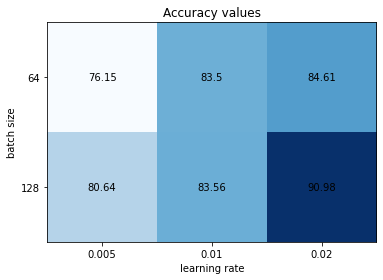

In [10]:
batch_set = [64,128]
learning_rate_set = [0.005, 0.01, 0.02]
fig, ax = plt.subplots()
ax.imshow(accuracy_matrix, cmap=plt.cm.Blues)
for i in range(2):
    for j in range(3):
        c = round( accuracy_matrix[i,j], 2)
        ax.text(j,i , str(c), va='center', ha='center')
        
ax.set_xticks(np.arange(len(learning_rate_set)))
ax.set_yticks(np.arange(len(batch_set)))
ax.set_xticklabels(learning_rate_set)
ax.set_yticklabels(batch_set)
ax.set_xlabel("learning rate")
ax.set_ylabel("batch size")
ax.set_title("Accuracy values")
fig.tight_layout()
plt.show()

## Question 2

Please use “dropout”, “batch normalization” and any “data augmentation” to train to improve the accuracy of (2) MLP (Net2）in Question 1 a. (Batch size is 64 and learning rate is 0.01). Please describe clearly your design choices.

In [12]:
%matplotlib inline

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt

device = torch.device('cpu')

batch_size = 64

train_transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize(0.5,0.5)])

test_transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize(0.5,0.5)])


print("Number of training images - ", len(train_dataset.data))
print("Size of images - ", train_dataset.data[0].shape)


train_dataset = datasets.MNIST('./data', 
                               train=True, 
                               download=True, 
                               transform=train_transform)


# print( train_dataset.__getitem__(1) )
validation_dataset = datasets.MNIST('./data', 
                                    train=False, 
                                    transform=test_transform)

## construct the loader for training
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
                                          shuffle=True)

## construct the loader for validation
validation_loader = torch.utils.data.DataLoader(validation_dataset, batch_size=batch_size,
                                         shuffle=False)

Number of training images -  60000
Size of images -  torch.Size([28, 28])


In [15]:
class Net2(nn.Module):
    def __init__(self):
        super(Net2, self).__init__()
               
        self.fc1 = nn.Linear(28*28*36, 128)
        self.fc2 = nn.Linear(128, 10)


    def forward(self, x):

        # upsampling
        m = nn.UpsamplingNearest2d(scale_factor= 6)
        x = m(x)

        
        # dropout
        m = nn.Dropout(p=0.2)
        x = m(x)
       
        #batch norm
        m2 = nn.BatchNorm2d(1, affine=False)
        x = m2(x)

    
        x = x.view(-1, x[0].shape[0]*x[0].shape[1]*x[0].shape[2] )
        
        ## forward x to the first fully connected layer.
        x = self.fc1(x)

        ## forward x to relu activation function.
        x = F.relu(x)
        
        ## forward x to the second fully connected layer.
        x = self.fc2(x)
     
        ## forward x to softmax activation function.
        x = F.softmax(x, dim=1)
        
        return x    

net = Net2()
print(net)

Net2(
  (fc1): Linear(in_features=28224, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


In [16]:
def train(epoch, log_interval=200):
    model.train()
    
    
    for batch_idx, (data, target) in enumerate(train_loader):
        data = data.to(device)
        target = target.to(device)

        ## zero gradient buffers
        optimizer.zero_grad()
        
        ## pass data through the network
        output = model(data)
        
        
        pred = output.data.max(1)[1]

        ## calculate loss
        loss = criterion(output, target)

        ## backpropagate
        loss.backward()
        
        ## update weights
        optimizer.step()
        
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.data.item()))
        
        
        
def validate(loss_vector, accuracy_vector):
    model.eval()
    val_loss, correct = 0, 0
    
    pred_all = []
    for data, target in validation_loader:
        data = data.to(device)
        target = target.to(device)
        output = model(data)
        val_loss += criterion(output, target).data.item()
        
        pred = output.data.max(1)[1]
        
        pred_all.extend(pred)
        
        correct += pred.eq(target.data).sum()

    val_loss /= len(validation_loader)
    loss_vector.append(val_loss)

    accuracy = 100. * correct.to(torch.float32) / len(validation_loader.dataset)
    accuracy_vector.append(accuracy)
    
    print('\nValidation set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        val_loss, correct, len(validation_loader.dataset), accuracy))
    
    
    pred_all = np.array(pred_all)

    return pred_all

    
## Trainig and evaluating 2) MLP
model = Net2().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

## define the crosstntropy loss.
criterion = nn.CrossEntropyLoss()

epochs = 20
lossv, accv = [], []
for epoch in range(1, epochs + 1):
    train(epoch)
    pred_all = validate(lossv,accv)

np.save('results.npy',pred_all)


print(np.shape(pred_all))
#     validate(lossv, accv)


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.300300
Train Epoch: 1 [12800/60000 (21%)]	Loss: 1.631561
Train Epoch: 1 [25600/60000 (43%)]	Loss: 1.510085
Train Epoch: 1 [38400/60000 (64%)]	Loss: 1.518286
Train Epoch: 1 [51200/60000 (85%)]	Loss: 1.551883

Validation set: Average loss: 1.5396, Accuracy: 9310/10000 (93.10%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 1.559409
Train Epoch: 2 [12800/60000 (21%)]	Loss: 1.578854
Train Epoch: 2 [25600/60000 (43%)]	Loss: 1.494314
Train Epoch: 2 [38400/60000 (64%)]	Loss: 1.533016
Train Epoch: 2 [51200/60000 (85%)]	Loss: 1.510138

Validation set: Average loss: 1.5240, Accuracy: 9448/10000 (94.48%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 1.557608
Train Epoch: 3 [12800/60000 (21%)]	Loss: 1.508016
Train Epoch: 3 [25600/60000 (43%)]	Loss: 1.512629
Train Epoch: 3 [38400/60000 (64%)]	Loss: 1.510983
Train Epoch: 3 [51200/60000 (85%)]	Loss: 1.500684

Validation set: Average loss: 1.5156, Accuracy: 9512/10000 (95.12%)

Train Epoch: 4 [0/60000 (0%)]	Loss: 1.481236
Train Epoc

## Question 3

Please complete the missing code to use RBM to initialize the parameters of the (1) MLP (Net1) in Question 1 a. Compare the accuracy values with and without RBM pretraining by plotting a bar chart.

In [25]:
%matplotlib inline

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt

device = torch.device('cpu')
batch_size = 64
train_transform = transforms.Compose([ transforms.ToTensor()])

test_transform = transforms.Compose([transforms.ToTensor()])

train_dataset = datasets.MNIST('./data', 
                               train=True,                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            download=True, 
                               transform=train_transform)

validation_dataset = datasets.MNIST('./data', 
                                    train=False, 
                                    transform=test_transform)

## construct the loader for training
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
                                          shuffle=True)

## construct the loader for validation
validation_loader = torch.utils.data.DataLoader(validation_dataset, batch_size=batch_size,
                                         shuffle=False)

class RBM():

    def __init__(self, num_visible, num_hidden, k, learning_rate=0.1):
        self.num_visible = num_visible
        self.num_hidden = num_hidden
        self.k = k
        self.learning_rate = learning_rate

        self.weights = torch.randn(num_visible, num_hidden) * 0.01
        self.visible_bias = torch.ones(num_visible) * 0.01
        self.hidden_bias = torch.zeros(num_hidden)
        
    def _sigmoid(self, x):
        return 1 / (1 + torch.exp(-x))

    def _random_probabilities(self, num):
        random_probabilities = torch.rand(num)
        return random_probabilities
    
## compute the probability of hidden nodes given visible nodes.
    def compute_hidden(self, visible_probabilities):
        
        hidden_activations = torch.matmul(visible_probabilities, self.weights) + self.hidden_bias
        
        hidden_probabilities = self._sigmoid(hidden_activations)
        return hidden_probabilities

## compute the probability of visible nodes given hidden nodes.
    def compute_visible(self, hidden_probabilities):
        
        visible_activations = torch.matmul(hidden_probabilities, self.weights.t()) + self.visible_bias
        
        visible_probabilities = self._sigmoid(visible_activations)
        return visible_probabilities
    
## Contrastive Divergence (CD-k)
    def contrastive_divergence(self, input_data):
        
        positive_hidden_probabilities = self.compute_hidden(input_data)
        
        ## sample a hidden activation vector from its probability distribution
        positive_hidden_activations = (positive_hidden_probabilities >= self._random_probabilities(self.num_hidden)).float()
        
        
        ## compute the positive gradient
        positive_associations = torch.matmul(input_data.t(), positive_hidden_activations)


        hidden_activations = positive_hidden_activations

        for step in range(self.k):
            visible_probabilities = self.compute_visible(hidden_activations)
            hidden_probabilities = self.compute_hidden(visible_probabilities)
            
            ## resample a hidden activation vector from its probability distribution
            hidden_activations = (hidden_probabilities >= self._random_probabilities(self.num_hidden)).float()


        negative_visible_probabilities = visible_probabilities
        negative_hidden_probabilities = hidden_probabilities
        
        ## compute the nagetive gradient
        negative_associations = torch.matmul(negative_visible_probabilities.t(), negative_hidden_probabilities)

        
        batch_size = input_data.size(0)
        
        ## update weights
        self.weights += (positive_associations - negative_associations) * self.learning_rate / batch_size
        
        ## update bias of visible units
        self.visible_bias += torch.sum(input_data - negative_visible_probabilities, dim=0) * self.learning_rate / batch_size

        ## update bias of hidden units
        self.hidden_bias += torch.sum(positive_hidden_probabilities - negative_hidden_probabilities, dim=0) * self.learning_rate / batch_size

        ## compute reconstruction error
        error = torch.mean((input_data - negative_visible_probabilities)**2)

        return error

BATCH_SIZE = 64
VISIBLE_UNITS = 784  # 28 x 28 images
HIDDEN_UNITS = 128
CD_K = 3
EPOCHS = 5

########## TRAINING RBM ##########
print('Training RBM...')

rbm = RBM(VISIBLE_UNITS, HIDDEN_UNITS, CD_K)

for epoch in range(EPOCHS):
    epoch_error = 0.0
    num_batch = 0
    for batch, _ in train_loader:
        batch = batch.view(len(batch), VISIBLE_UNITS)  # flatten input data

        batch_error = rbm.contrastive_divergence(batch)
        epoch_error += batch_error
        num_batch = num_batch + 1

    print('Epoch Error (epoch=%d): %.4f' % (epoch, epoch_error/num_batch))

Training RBM...
Epoch Error (epoch=0): 0.0438
Epoch Error (epoch=1): 0.0295
Epoch Error (epoch=2): 0.0261
Epoch Error (epoch=3): 0.0243
Epoch Error (epoch=4): 0.0230


We now check whether the trained RBM model can extract features from the images.

We calculate the probability of hidden nodes given input MNIST data as features and use a SciPy-based logistic regression for classification.

In [26]:
from sklearn.linear_model import LogisticRegression

print('Extracting features...')

train_features = np.zeros((len(train_dataset), HIDDEN_UNITS))
train_labels = np.zeros(len(train_dataset))
test_features = np.zeros((len(validation_dataset), HIDDEN_UNITS))
test_labels = np.zeros(len(validation_dataset))

for i, (batch, labels) in enumerate(train_loader):
    batch = batch.view(len(batch), VISIBLE_UNITS)  # flatten input data
    try:
        train_features[i*BATCH_SIZE:i*BATCH_SIZE+len(batch)] = rbm.compute_hidden(batch).numpy()
        train_labels[i*BATCH_SIZE:i*BATCH_SIZE+len(batch)] = labels.numpy()
    except:
        size = len(train_dataset) - i*BATCH_SIZE
        train_features[i*BATCH_SIZE:len(train_dataset)] = rbm.compute_hidden(batch).numpy()[0:size]
        train_labels[i*BATCH_SIZE:len(train_dataset)] = labels.numpy()[0:size]        

for i, (batch, labels) in enumerate(validation_loader):
    batch = batch.view(len(batch), VISIBLE_UNITS)  # flatten input data
    try:
        test_features[i*BATCH_SIZE:i*BATCH_SIZE+len(batch)] = rbm.compute_hidden(batch).numpy()
        test_labels[i*BATCH_SIZE:i*BATCH_SIZE+len(batch)] = labels.numpy()
    except:
        size = len(test_dataset) - i*BATCH_SIZE
        test_features[i*BATCH_SIZE:len(test_dataset)] = rbm.compute_hidden(batch).numpy()[0:size]
        test_labels[i*BATCH_SIZE:len(test_dataset)] = labels.numpy()[0:size]  


########## CLASSIFICATION ##########
print('Classifying...')

clf = LogisticRegression()
clf.fit(train_features, train_labels)
predictions = clf.predict(test_features)

print('Classification Accuracy: %d/%d' % (sum(predictions == test_labels), test_labels.shape[0]))

Extracting features...
Classifying...
Classification Accuracy: 9404/10000


/Users/kangyetian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [27]:
class Net1(nn.Module):
    def __init__(self):
        super(Net1, self).__init__()
        
        self.fc1 = nn.Linear(28*28, 128)
        ## initialize the paramaters with the weights and hidden_bias in trained RBM.
        self.fc1.weight = nn.Parameter(torch.transpose(rbm.weights,1,0))
        self.fc1.bias = nn.Parameter(rbm.hidden_bias)
        
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        
        ## forward x to the first fully connected layer.
        x = self.fc1(x)

        ## forward x to sigmoid activation function.
        x = torch.sigmoid(x)
        
        ## forward x to the second fully connected layer.
        x = self.fc2(x)
        
        ## forward x to softmax activation function.
        m = nn.Softmax()
        x = m(x)
        
        return x     
    
def train(epoch, log_interval=200):
    model.train()
    
    for batch_idx, (data, target) in enumerate(train_loader):
        data = data.to(device)
        target = target.to(device)

        ## zero gradient buffers
        optimizer.zero_grad()
        
        ## pass data through the network
        output = model(data)

        ## calculate loss
        loss = criterion(output, target)
        
        

        ## backpropagate
        loss.backward()
        
        ## update weights
        optimizer.step()
        
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.data.item()))

def validate(loss_vector, accuracy_vector):
    model.eval()
    val_loss, correct = 0, 0
    for data, target in validation_loader:
        data = data.to(device)
        target = target.to(device)
        output = model(data)
        val_loss += criterion(output, target).data.item()
        
        pred = output.data.max(1)[1]
        
        correct += pred.eq(target.data).sum()

    val_loss /= len(validation_loader)
    loss_vector.append(val_loss)

    accuracy = 100. * correct.to(torch.float32) / len(validation_loader.dataset)
    accuracy_vector.append(accuracy)
    
    print('\nValidation set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        val_loss, correct, len(validation_loader.dataset), accuracy))
    
## Trainig and evaluating 1) MLP
model = Net1().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

## define the crosstntropy loss.
criterion = nn.CrossEntropyLoss()

epochs = 5
lossv, accv_rbm = [], []
for epoch in range(1, epochs + 1):
    train(epoch)
    validate(lossv, accv_rbm)

<ipython-input-27-8525b86da34f>:26: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = m(x)


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.310543
Train Epoch: 1 [12800/60000 (21%)]	Loss: 2.259072
Train Epoch: 1 [25600/60000 (43%)]	Loss: 2.155857
Train Epoch: 1 [38400/60000 (64%)]	Loss: 2.101352
Train Epoch: 1 [51200/60000 (85%)]	Loss: 2.081429

Validation set: Average loss: 2.0719, Accuracy: 4487/10000 (44.87%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 2.071383
Train Epoch: 2 [12800/60000 (21%)]	Loss: 2.107463
Train Epoch: 2 [25600/60000 (43%)]	Loss: 1.975177
Train Epoch: 2 [38400/60000 (64%)]	Loss: 1.963709
Train Epoch: 2 [51200/60000 (85%)]	Loss: 1.916860

Validation set: Average loss: 1.8803, Accuracy: 7819/10000 (78.19%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 1.876910
Train Epoch: 3 [12800/60000 (21%)]	Loss: 1.777146
Train Epoch: 3 [25600/60000 (43%)]	Loss: 1.745756
Train Epoch: 3 [38400/60000 (64%)]	Loss: 1.827403
Train Epoch: 3 [51200/60000 (85%)]	Loss: 1.769218

Validation set: Average loss: 1.7794, Accuracy: 8079/10000 (80.79%)

Train Epoch: 4 [0/60000 (0%)]	Loss: 1.885615
Train Epoc

In [28]:
# for comparison, run the net1 again in Q1

%matplotlib inline

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt

device = torch.device('cpu')

batch_size = 64

train_transform = transforms.Compose([ transforms.ToTensor()])

test_transform = transforms.Compose([transforms.ToTensor()])

train_dataset = datasets.MNIST('./data', 
                               train=True, 
                               download=True, 
                               transform=train_transform)

validation_dataset = datasets.MNIST('./data', 
                                    train=False, 
                                    transform=test_transform)

## construct the loader for training
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
                                          shuffle=True)

## construct the loader for validation
validation_loader = torch.utils.data.DataLoader(validation_dataset, batch_size=batch_size,
                                         shuffle=False)



class Net1(nn.Module):
    def __init__(self):
        super(Net1, self).__init__()
        
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        
        ## forward x to the first fully connected layer.
        x = self.fc1(x)
        
        ## forward x to sigmoid activation function.
        x = torch.sigmoid(x)
        
        ## forward x to the second fully connected layer.
        x = self.fc2(x)
        
        ## forward x to softmax activation function.
        m = nn.Softmax()
        x = m(x)
        
        return x
    
def train(epoch, log_interval=200):
    model.train()
    
    for batch_idx, (data, target) in enumerate(train_loader):
        data = data.to(device)
        target = target.to(device)

        ## zero gradient buffers
        optimizer.zero_grad()
        
        ## pass data through the network
        output = model(data)

        ## calculate loss
        loss = criterion(output, target)

        ## backpropagate
        loss.backward()
        
        ## update weights
        optimizer.step()
        
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.data.item()))

def validate(loss_vector, accuracy_vector):
    model.eval()
    val_loss, correct = 0, 0
    for data, target in validation_loader:
        data = data.to(device)
        target = target.to(device)
        output = model(data)
        val_loss += criterion(output, target).data.item()
        
        pred = output.data.max(1)[1]
        
        correct += pred.eq(target.data).sum()

    val_loss /= len(validation_loader)
    loss_vector.append(val_loss)

    accuracy = 100. * correct.to(torch.float32) / len(validation_loader.dataset)
    accuracy_vector.append(accuracy)
    
    print('\nValidation set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        val_loss, correct, len(validation_loader.dataset), accuracy))

## Trainig and evaluating 1) MLP
model = Net1().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

## define the crosstntropy loss.
criterion = nn.CrossEntropyLoss()

epochs = 5
lossv, accv2 = [], []
for epoch in range(1, epochs + 1):
    train(epoch)
    validate(lossv, accv2)


<ipython-input-28-c3d031cd4edc>:60: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = m(x)


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.302446
Train Epoch: 1 [12800/60000 (21%)]	Loss: 2.303570
Train Epoch: 1 [25600/60000 (43%)]	Loss: 2.304434
Train Epoch: 1 [38400/60000 (64%)]	Loss: 2.292588
Train Epoch: 1 [51200/60000 (85%)]	Loss: 2.295793

Validation set: Average loss: 2.2926, Accuracy: 1135/10000 (11.35%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 2.295002
Train Epoch: 2 [12800/60000 (21%)]	Loss: 2.281097
Train Epoch: 2 [25600/60000 (43%)]	Loss: 2.281479
Train Epoch: 2 [38400/60000 (64%)]	Loss: 2.266376
Train Epoch: 2 [51200/60000 (85%)]	Loss: 2.261847

Validation set: Average loss: 2.2665, Accuracy: 1977/10000 (19.77%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 2.289189
Train Epoch: 3 [12800/60000 (21%)]	Loss: 2.261223
Train Epoch: 3 [25600/60000 (43%)]	Loss: 2.287358
Train Epoch: 3 [38400/60000 (64%)]	Loss: 2.203677
Train Epoch: 3 [51200/60000 (85%)]	Loss: 2.247274

Validation set: Average loss: 2.2089, Accuracy: 2622/10000 (26.22%)

Train Epoch: 4 [0/60000 (0%)]	Loss: 2.217066
Train Epoc

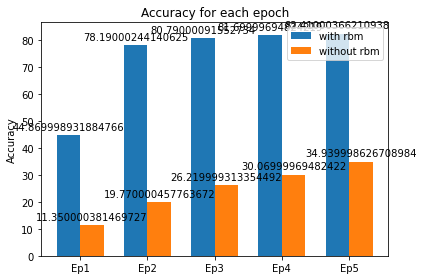

In [36]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

labels = ['Ep1', 'Ep2', 'Ep3', 'Ep4', 'Ep5']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars    

# #round to integer to make the bar chart more friendly
# accv_rbm_round = [0,0,0,0,0] 
# accv2_round = [0,0,0,0,0]
# for i in range(5):
#     accv_rbm_round[i] = accv_rbm[i].round() 
#     accv2_round[i] = accv2[i].round() 

    
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, accv_rbm, width, label='with rbm')
rects2 = ax.bar(x + width/2, accv2, width, label='without rbm')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy for each epoch')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()